<h1 style="font-weight:bold;text-align:center"> Bank Marketing Campaign </h1>

***

<p style="text-align:center;font-weight:600">&emsp;Sean Kristian Anderson&emsp;||&emsp;Davis Sebastian&emsp;</p>
<p style="text-align:center;">DTIDS-0206 Final Project by Alpha Team</p>

***

<p style="font-weight:500">Table Of Contents</p>

1. [Business Problem Understanding](#1-business-problem-understanding)       
    1.1. [Context](#11-context) \
    1.2. [Target](#12-target) \
    1.3. [Problem Statement](#13-problem-statement) \
    1.4. [Goals](#14-goals) \
    1.5. [Analytical Approach](#15-analytical-approach) \
    1.6. [Metric Evaluation](#16-metric-evaluation)
2. [Data Understanding](#data-understanding) \
    2.1. [Attribute Information](#attribute-information)      
    2.2. [Descriptive Statistics](#descriptive-statistics)     
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda) \
    3.1. Data Distribution
4. [Data Preprocessing](#data-preprocessing)       
    4.1. [Duplicated Values](#duplicated-values)      
    4.2. [Missing Values](#missing-values)     
    4.3. [Outliers](#outliers)
5. [Modeling & Evaluation](#methodology)        
    5.1. [Modeling](#modeling)
6. [Summary](#conclusion-and-recommendation)        
    6.1. [Conclusion](#conclusion)     
    6.2. [Recommendation](#recommendation)     



Tableau:

Slide Presentation: <a href src="https://www.canva.com/design/DAGeScCufiI/OtTsdTuXp_rSrNaKOxwcsQ/edit?utm_content=DAGeScCufiI&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton">Click Here</a>

## 1. Business Problem Understanding

### 1.1. Context

A Portuguese retail bank offers term deposit products, which are one of the popular investment services in the banking sector. A term deposit involves customers depositing a specific sum of money for a fixed period, with the promise of a guaranteed interest rate upon maturity. This product allows the bank to secure stable funds for a defined term, providing a predictable source of liquidity and facilitating better fund allocation planning.

Given these advantages, the bank aims to grow the customer base for its term deposit offerings. The strategy to achieve this involves reaching out to potential customers directly through phone calls.

### 1.2. Target

- 0: client won't subscribe a term deposit
- 1: client will subscribe a term deposit

### 1.3. Problem Statement

Through phone calls, the bank can provide more detailed information about the term deposit product, answer customer questions directly, and reassure them about the benefits and security of the product. This approach also incurs lower costs compared to inorganic advertisements. However, the downside of this method is that it requires significant time and effort. Conversion rates are typically low, and without proper predictions, customer service may waste time calling numerous customers, with only a few ultimately deciding to make a deposit.

### 1.4. Goals

Based on the issue outlined above, the company aims to develop the capability to identify customers with a high likelihood of subscribing to term deposits, allowing them to secure as many term deposits as quickly as possible for operational purposes. Additionally, the company seeks to uncover any patterns among customers who are likely to make a deposit and determine the most effective strategies for reaching out to them, based on the available data.

### 1.5. Analytical Approach

We will begin by analyzing the data to uncover patterns that distinguish customers who are likely to make a deposit from those who are not. Based on these insights, we will develop targeted strategies for approaching potential customers. Importantly, we will build a classification model that will enable the bank to predict the probability of a customer making a deposit or not.

### 1.6. Metric Evaluation

Assumptions:
- Telemarketing cost: € 1.5 ([Statista](https://www.statista.com/outlook/amo/advertising/direct-messaging-advertising/telemarketing/portugal#ad-spending))
- Term deposit: € 100

![Confusion Matrix](https://glassboxmedicine.com/wp-content/uploads/2019/02/confusion-matrix.png?w=816)

Type 1 Error (False Positive)
> Consequence: Incorrectly contacting a customer who is unlikely to deposit, leading to wasted time and increased telemarketing costs.

Type 2 Error (False Negative)
> Consequence: Failing to contact a customer who would have deposited.

In this scenario, a higher rate of False Negatives results in more significant profit losses because the bank misses out on potential depositors. Therefore, the F2 Score is the most suitable metric, as it places greater emphasis on reducing False Negatives while still considering False Positives. This approach ensures the bank reaches out to as many potential depositors as possible, even if it means contacting a few customers who ultimately will not deposit. Ultimately, this strategy helps the bank maximize deposits, which is the primary objective.

## 2. Data Understanding

### Attribute Information

<p style="font-weight:500">Attribute Related to Bank Client Data</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| age | Integer | Age of users |
| job | Text (Categorical) | Type of Job | "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| marital | Text (Categorical) | Marital status of users | "divorced","married","single","unknown" |
| education | Text (Categorical) | Education of users | "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown" |
| default | Text (Categorical) | Has Credit in default? | "no","yes","unknown" |
| housing | Text (Categorical) | Has Housing Loan? | "no","yes","unknown" |
| loan | Text (Categorical) | Has Personal Loan? | "no","yes","unknown" |

<p style="font-weight:500">Attribute Related to Last Contact</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| contact | Text (Categorical) | Last contact communication type | "cellular","telephone" |
| month | Text (Categorical) | Last contact month of year | "jan", "feb", "mar", "apr", "may", "june", "july", "aug", "sept", "oct", "nov", "dec" |
| day_of_week | Text (Categorical) | Last contact day of week | "mon","tue","wed","thu","fri" | 
| duration | Integer | Last contact duration |

Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

<p style="font-weight:500">Other Attribute</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| campaign | Integer | Number of contacts performed during this campaign and for this client |
| pdays | Integer | Number of days passed after the client was last contacted from previous campaign |
| previous | Integer | Number of contacts performed before this campaign and for this client |
| poutcome | Text (Categorical) | Outcome of the previous marketing campaign | "failure","nonexistent","success" |

<p style="font-weight:500">Attribute Related to Social and Economic Contexts</p>

| Attribute | Data Type | Description |
| --- | --- | --- |
| emp.var.rate | Float | Employment variation rate |
| cons.price.idx | Float | Consumer price index |
| cons.conf.idx | Float | Consumer confidence index |
| euribor3m | Float | Euribor 3 month rate - daily indicator |
| nr.employed | Float | Number of employees - quarterly indicator |


Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

<p style="font-weight:500">Other</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- | 
| y | Text (Categorical) | Subscribed a term deposit (output) | "yes", "no" |

### 2.2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, KBinsDiscretizer, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.decomposition import PCA

# Model Selection
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.ensemble import BalancedRandomForestClassifier

### 2.3. Import Data

In [2]:
df = pd.read_csv('../Dataset/bank-additional-full.csv', sep=';')
display(df.head(), df.tail())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### 2.4. Basic Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
pd.set_option('display.max_colwidth', None)

list_data_num = []
list_data_cat = []

for col in df.select_dtypes(exclude='object').columns:
    list_data_num.append([col, df[col].dtype, df[col].isnull().sum(), round(df[col].isnull().sum() / df.shape[0] * 100, 2),
                     df[col].nunique(), df[col].unique()])
    
for col in df.select_dtypes(include='object').columns:
    list_data_cat.append([col, df[col].dtype, sum(df[col] == 'unknown'), round((sum(df[col] == 'unknown') / df.shape[0]) * 100, 2),
                     df[col].nunique(), df[col].unique()])
    
display(
    pd.DataFrame(data=list_data_num, columns=['column', 'type', 'null', 'null_pct', 'unique', 'values']),
    pd.DataFrame(data=list_data_cat, columns=['column', 'type', 'null', 'null_pct', 'unique', 'values'])
)

,column,type,null,null_pct,unique,values
0,age,int64,0,0.0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,duration,int64,0,0.0,1544,"[261, 149, 226, 151, 307, 198, 139, 217, 380, 50, 55, 222, 137, 293, 146, 174, 312, 440, 353, 195, 38, 262, 342, 181, 172, 99, 93, 233, 255, 362, 348, 386, 73, 230, 208, 336, 365, 1666, 577, 366, 314, 160, 212, 188, 22, 616, 178, 355, 225, 266, 253, 179, 269, 135, 161, 787, 145, 449, 812, 164, 357, 232, 91, 273, 158, 177, 200, 176, 211, 214, 1575, 349, 337, 272, 193, 165, 1042, 20, 246, 529, 192, 1467, 180, 48, 213, 545, 583, 221, 426, 287, 197, 257, 229, 400, 190, 21, 300, 123, 325, 514, ...]"
2,campaign,int64,0,0.0,42,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 18, 23, 14, 22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31, 30, 41, 37, 40, 33, 34, 43]"
3,pdays,int64,0,0.0,27,"[999, 6, 4, 3, 5, 1, 0, 10, 7, 8, 9, 11, 2, 12, 13, 14, 15, 16, 21, 17, 18, 22, 25, 26, 19, 27, 20]"
4,previous,int64,0,0.0,8,"[0, 1, 2, 3, 4, 5, 6, 7]"
5,emp.var.rate,float64,0,0.0,10,"[1.1, 1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3.0, -1.7, -1.1]"
6,cons.price.idx,float64,0,0.0,26,"[93.994, 94.465, 93.918, 93.444, 93.798, 93.2, 92.756, 92.843, 93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649, 92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199, 94.601, 94.767]"
7,cons.conf.idx,float64,0,0.0,26,"[-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45.9, -50.0, -47.1, -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33.0, -34.8, -34.6, -40.0, -39.8, -40.3, -38.3, -37.5, -49.5, -50.8]"
8,euribor3m,float64,0,0.0,316,"[4.857, 4.856, 4.855, 4.859, 4.86, 4.858, 4.864, 4.865, 4.866, 4.967, 4.961, 4.959, 4.958, 4.96, 4.962, 4.955, 4.947, 4.956, 4.966, 4.963, 4.957, 4.968, 4.97, 4.965, 4.964, 5.045, 5.0, 4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76, 4.733, 4.7, 4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191, 4.153, 4.12, 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743, 3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799, 1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65, 1.64, 1.629, 1.614, 1.602, 1.584, 1.574, 1.56, 1.556, 1.548, 1.538, 1.531, 1.52, 1.51, 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435, 1.423, 1.415, 1.41, 1.405, 1.406, 1.4, 1.392, 1.384, 1.372, 1.365, ...]"
9,nr.employed,float64,0,0.0,11,"[5191.0, 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]"


,column,type,null,null_pct,unique,values
0,job,object,330,0.80,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
1,marital,object,80,0.19,4,"[married, single, divorced, unknown]"
2,education,object,1731,4.20,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
3,default,object,8597,20.87,3,"[no, unknown, yes]"
4,housing,object,990,2.40,3,"[no, yes, unknown]"
5,loan,object,990,2.40,3,"[no, yes, unknown]"
6,contact,object,0,0.00,2,"[telephone, cellular]"
7,month,object,0,0.00,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
8,day_of_week,object,0,0.00,5,"[mon, tue, wed, thu, fri]"
9,poutcome,object,0,0.00,3,"[nonexistent, failure, success]"


In [5]:
display(df.describe(), df.describe(include='object'))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [6]:
print(f'Total rows that have at least 1 missing value: {df.isin(['unknown']).any(axis=1).sum()} ({round(df.isin(['unknown']).any(axis=1).sum() / df.shape[0] * 100, 2)})%')

Total rows that have at least 1 missing value: 10700 (25.98)%


In [7]:
print(f'Total duplicated rows: {df.duplicated().sum()} ({round(df.duplicated().sum() / df.shape[0] * 100, 2)})%')

Total duplicated rows: 12 (0.03)%


In [8]:
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")
print(f"Total rows with at least one missing value after removing duplicates: {df.isnull().any(axis=1).sum()} ({round(df.isnull().any(axis=1).sum() / df.shape[0] * 100, 2)})%")

Shape after removing duplicates: (41176, 21)
Total rows with at least one missing value after removing duplicates: 0 (0.0)%


## 3. Exploratory Data Analysis (EDA)

### 3.1. Data Distribution

#### 3.1.1. Target Distribution

In [9]:
df['y'].value_counts().index

Index(['no', 'yes'], dtype='object', name='y')

Text(0.5, 1.0, 'Target Proportion')

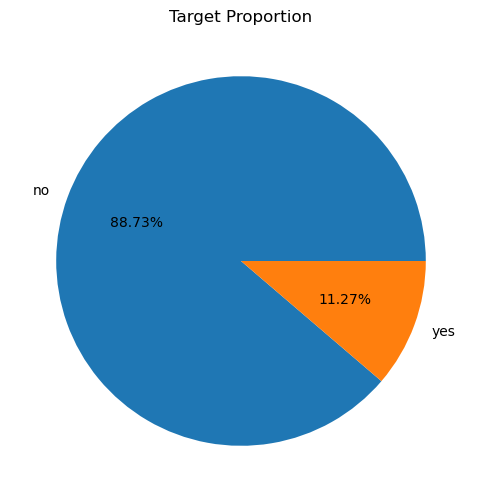

In [10]:
plt.figure(figsize=(10, 6))

plt.pie(
    x=df['y'].value_counts(),
    labels=df['y'].value_counts().index,
    autopct='%.2f%%'
)

plt.title('Target Proportion')

Notes:
- Our target is imbalance.
- In overall, the conversion rate from all data is 11.27%.

#### 3.1.2. Numerical Distribution

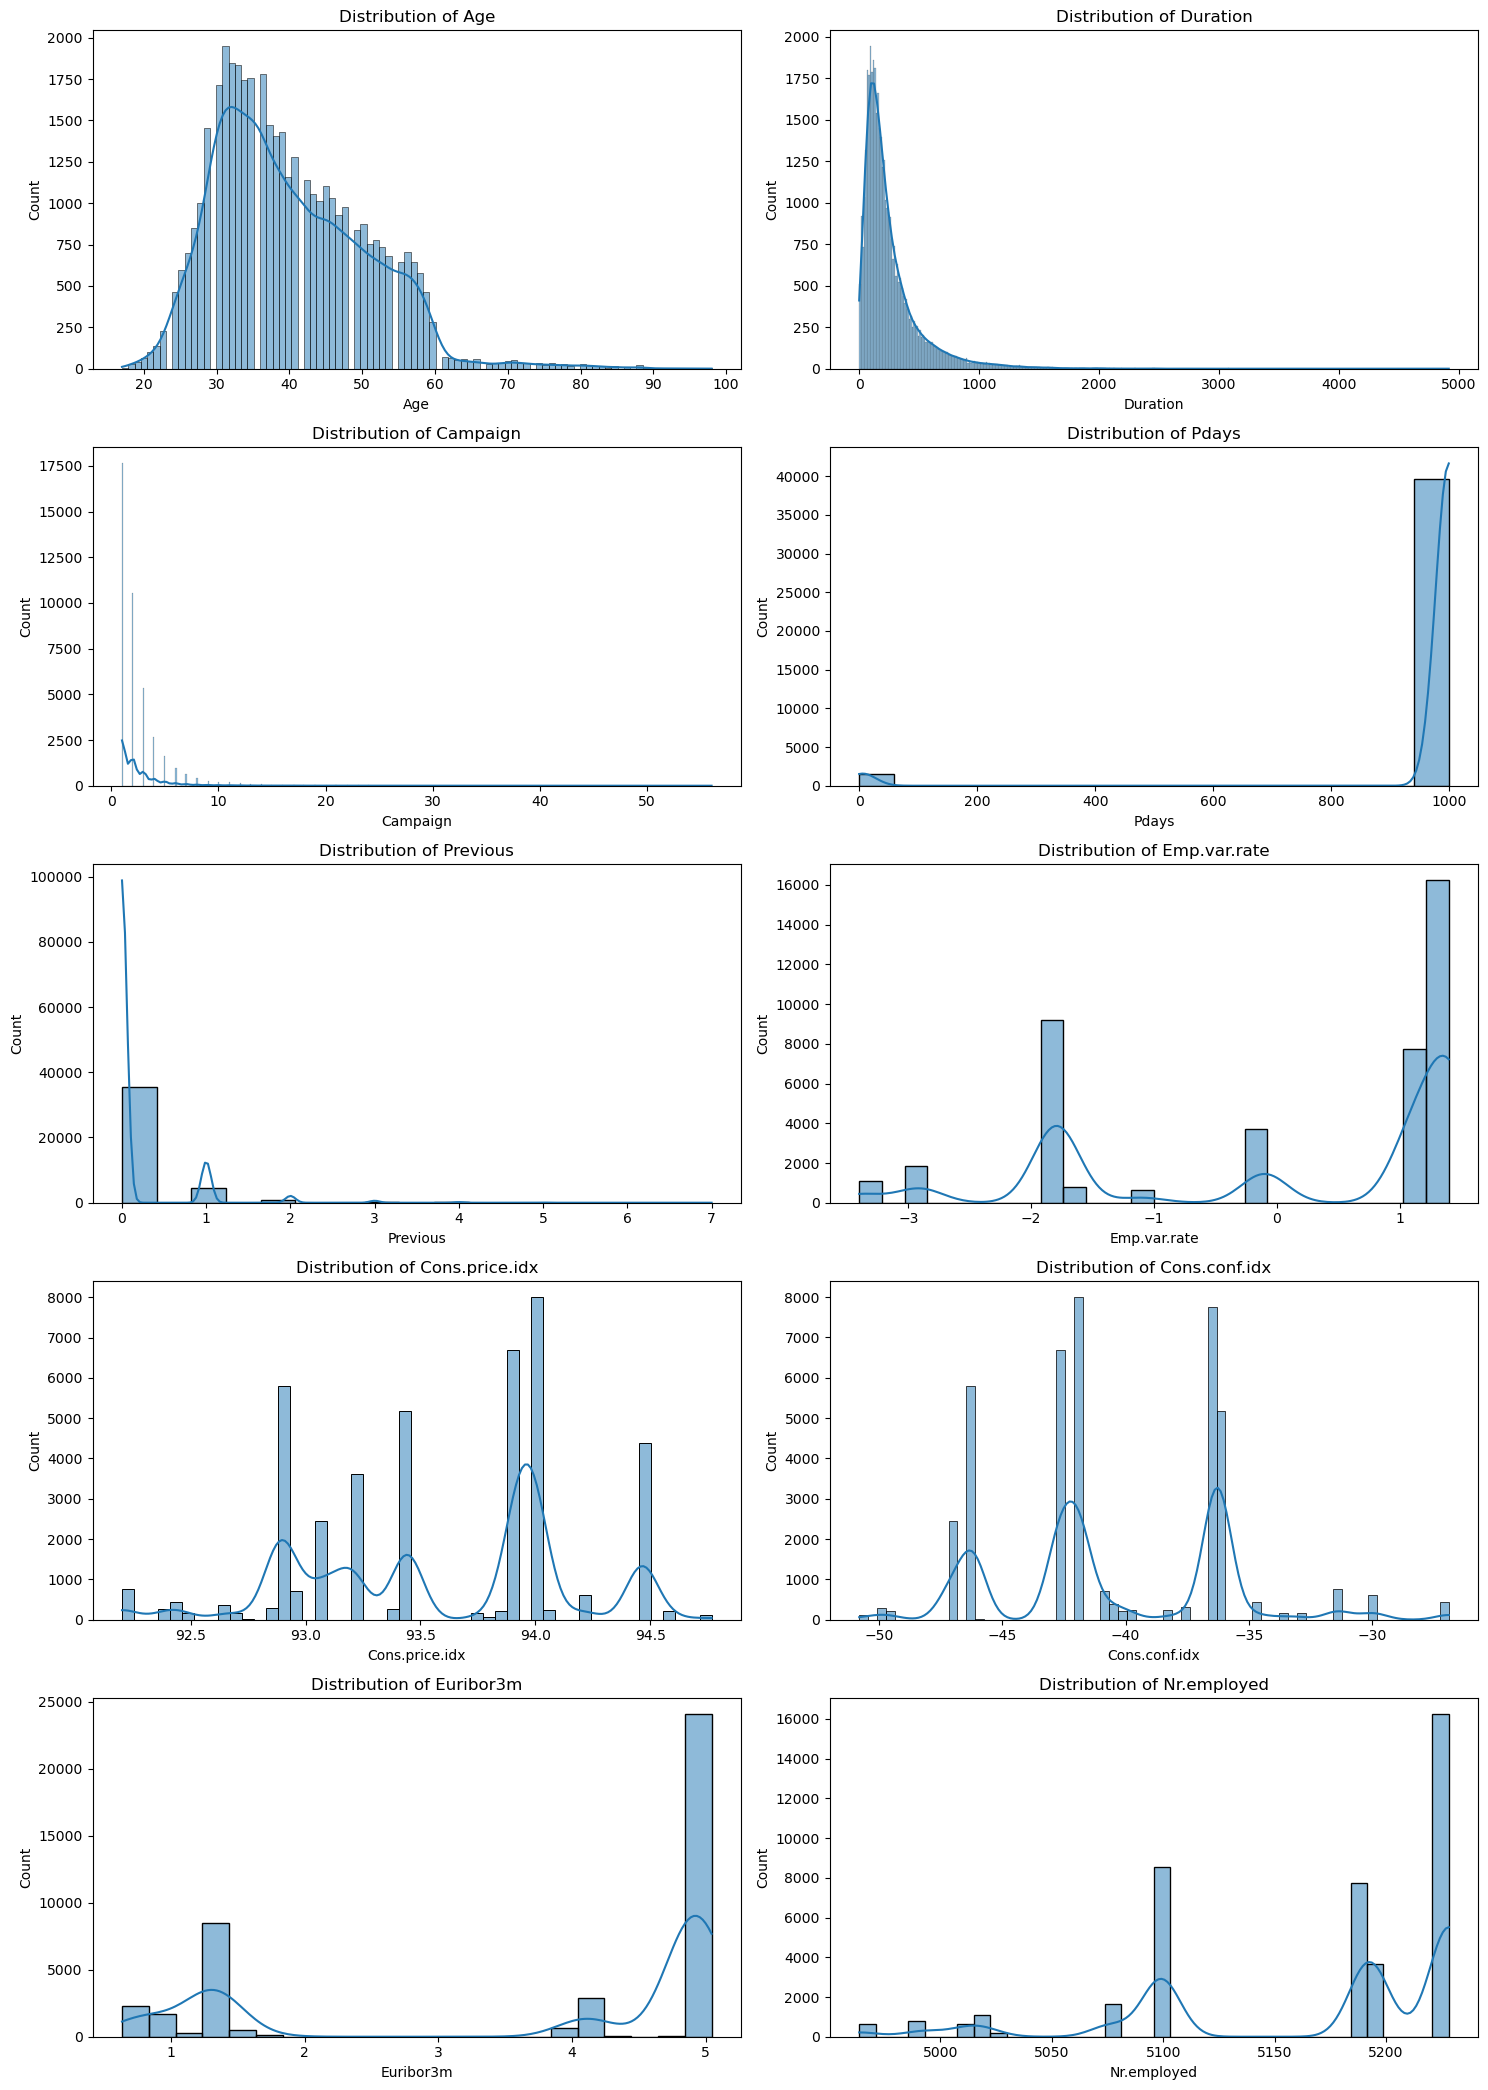

In [39]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 21))

ax = ax.flatten()

for i, col in enumerate(df.select_dtypes(exclude='object').columns):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {col.capitalize()}')
    ax[i].set_xlabel(f'{col.capitalize()}')
    ax[i].set_ylabel('Count')

plt.tight_layout()

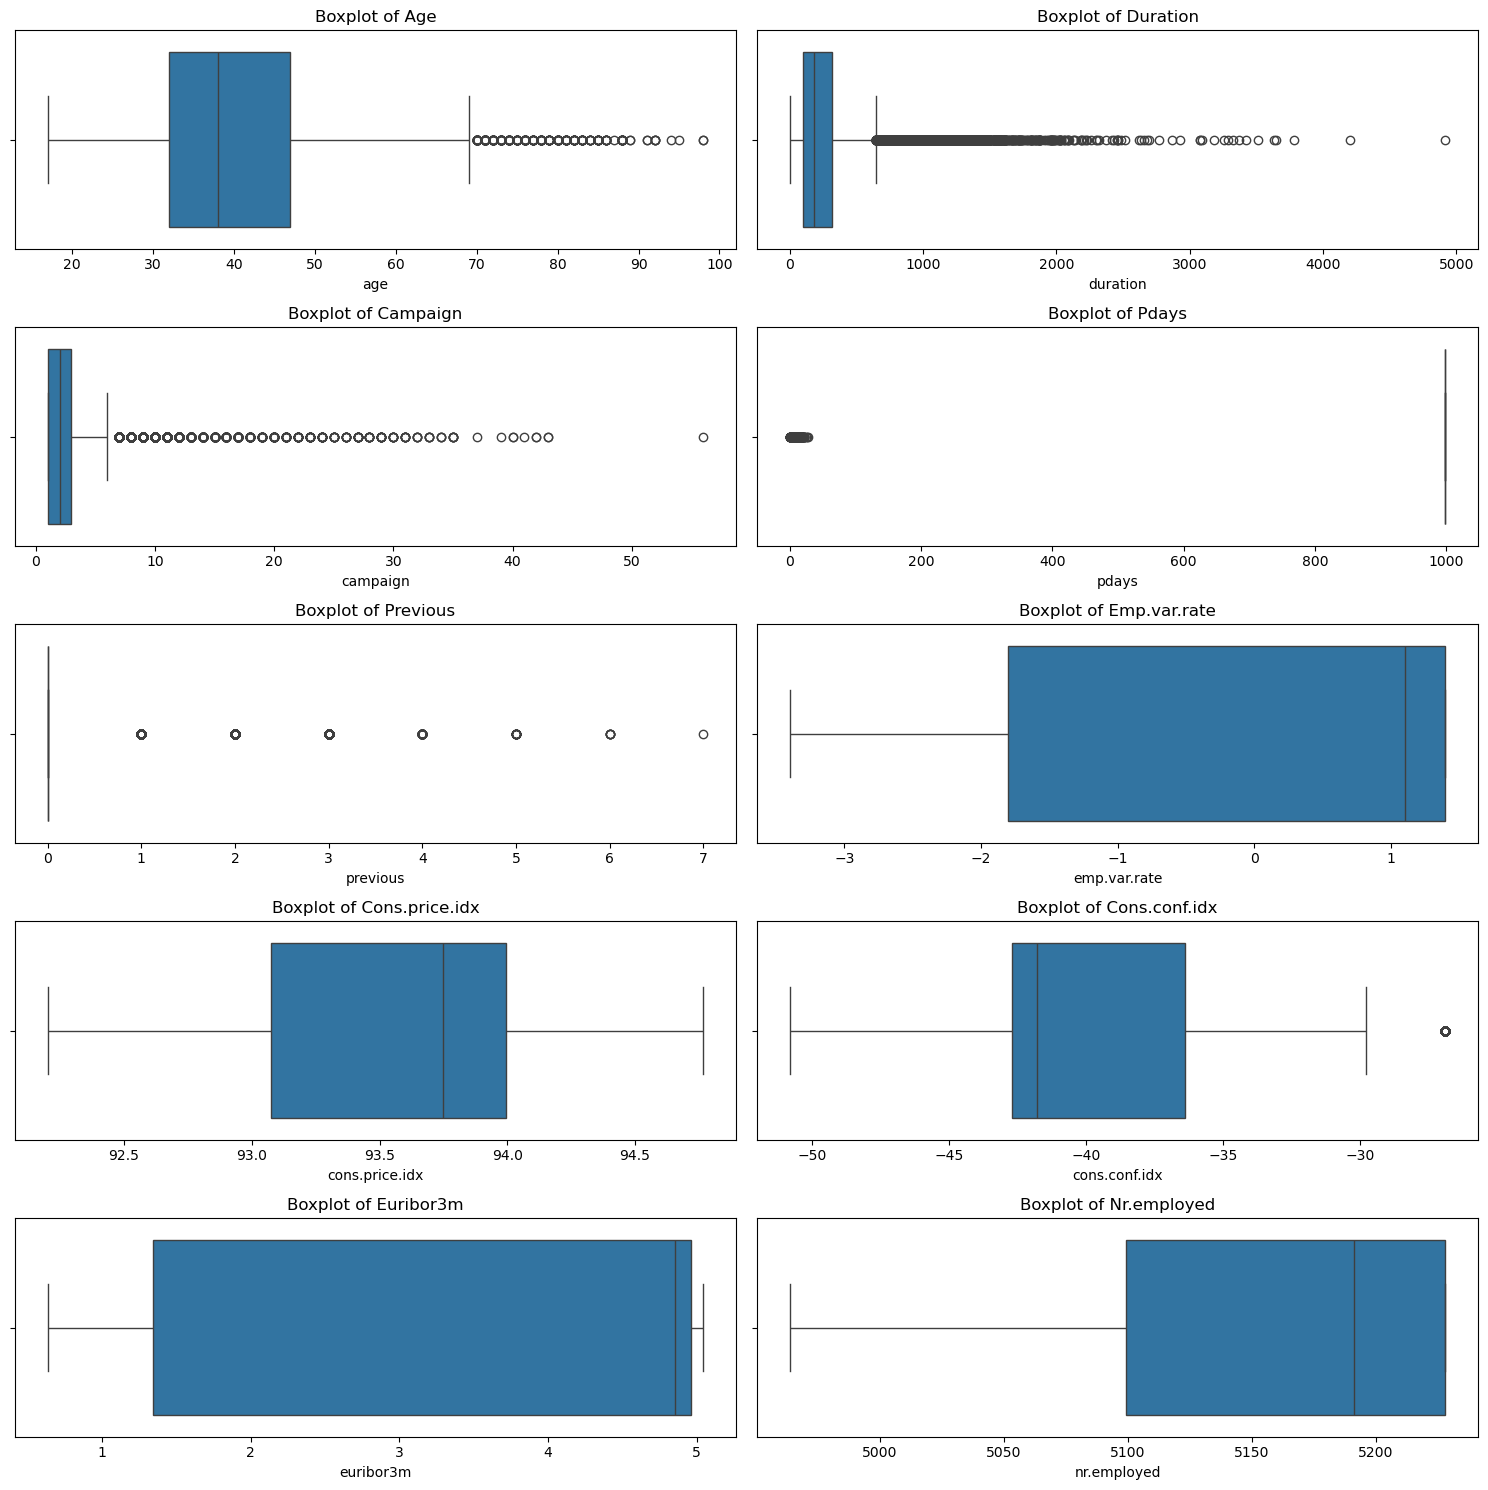

In [20]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

ax = ax.flatten()

for i, col in enumerate(df.select_dtypes(exclude='object').columns):
    sns.boxplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(f'Boxplot of {col.capitalize()}')

plt.tight_layout()

#### 3.1.3. Categorical Distribution

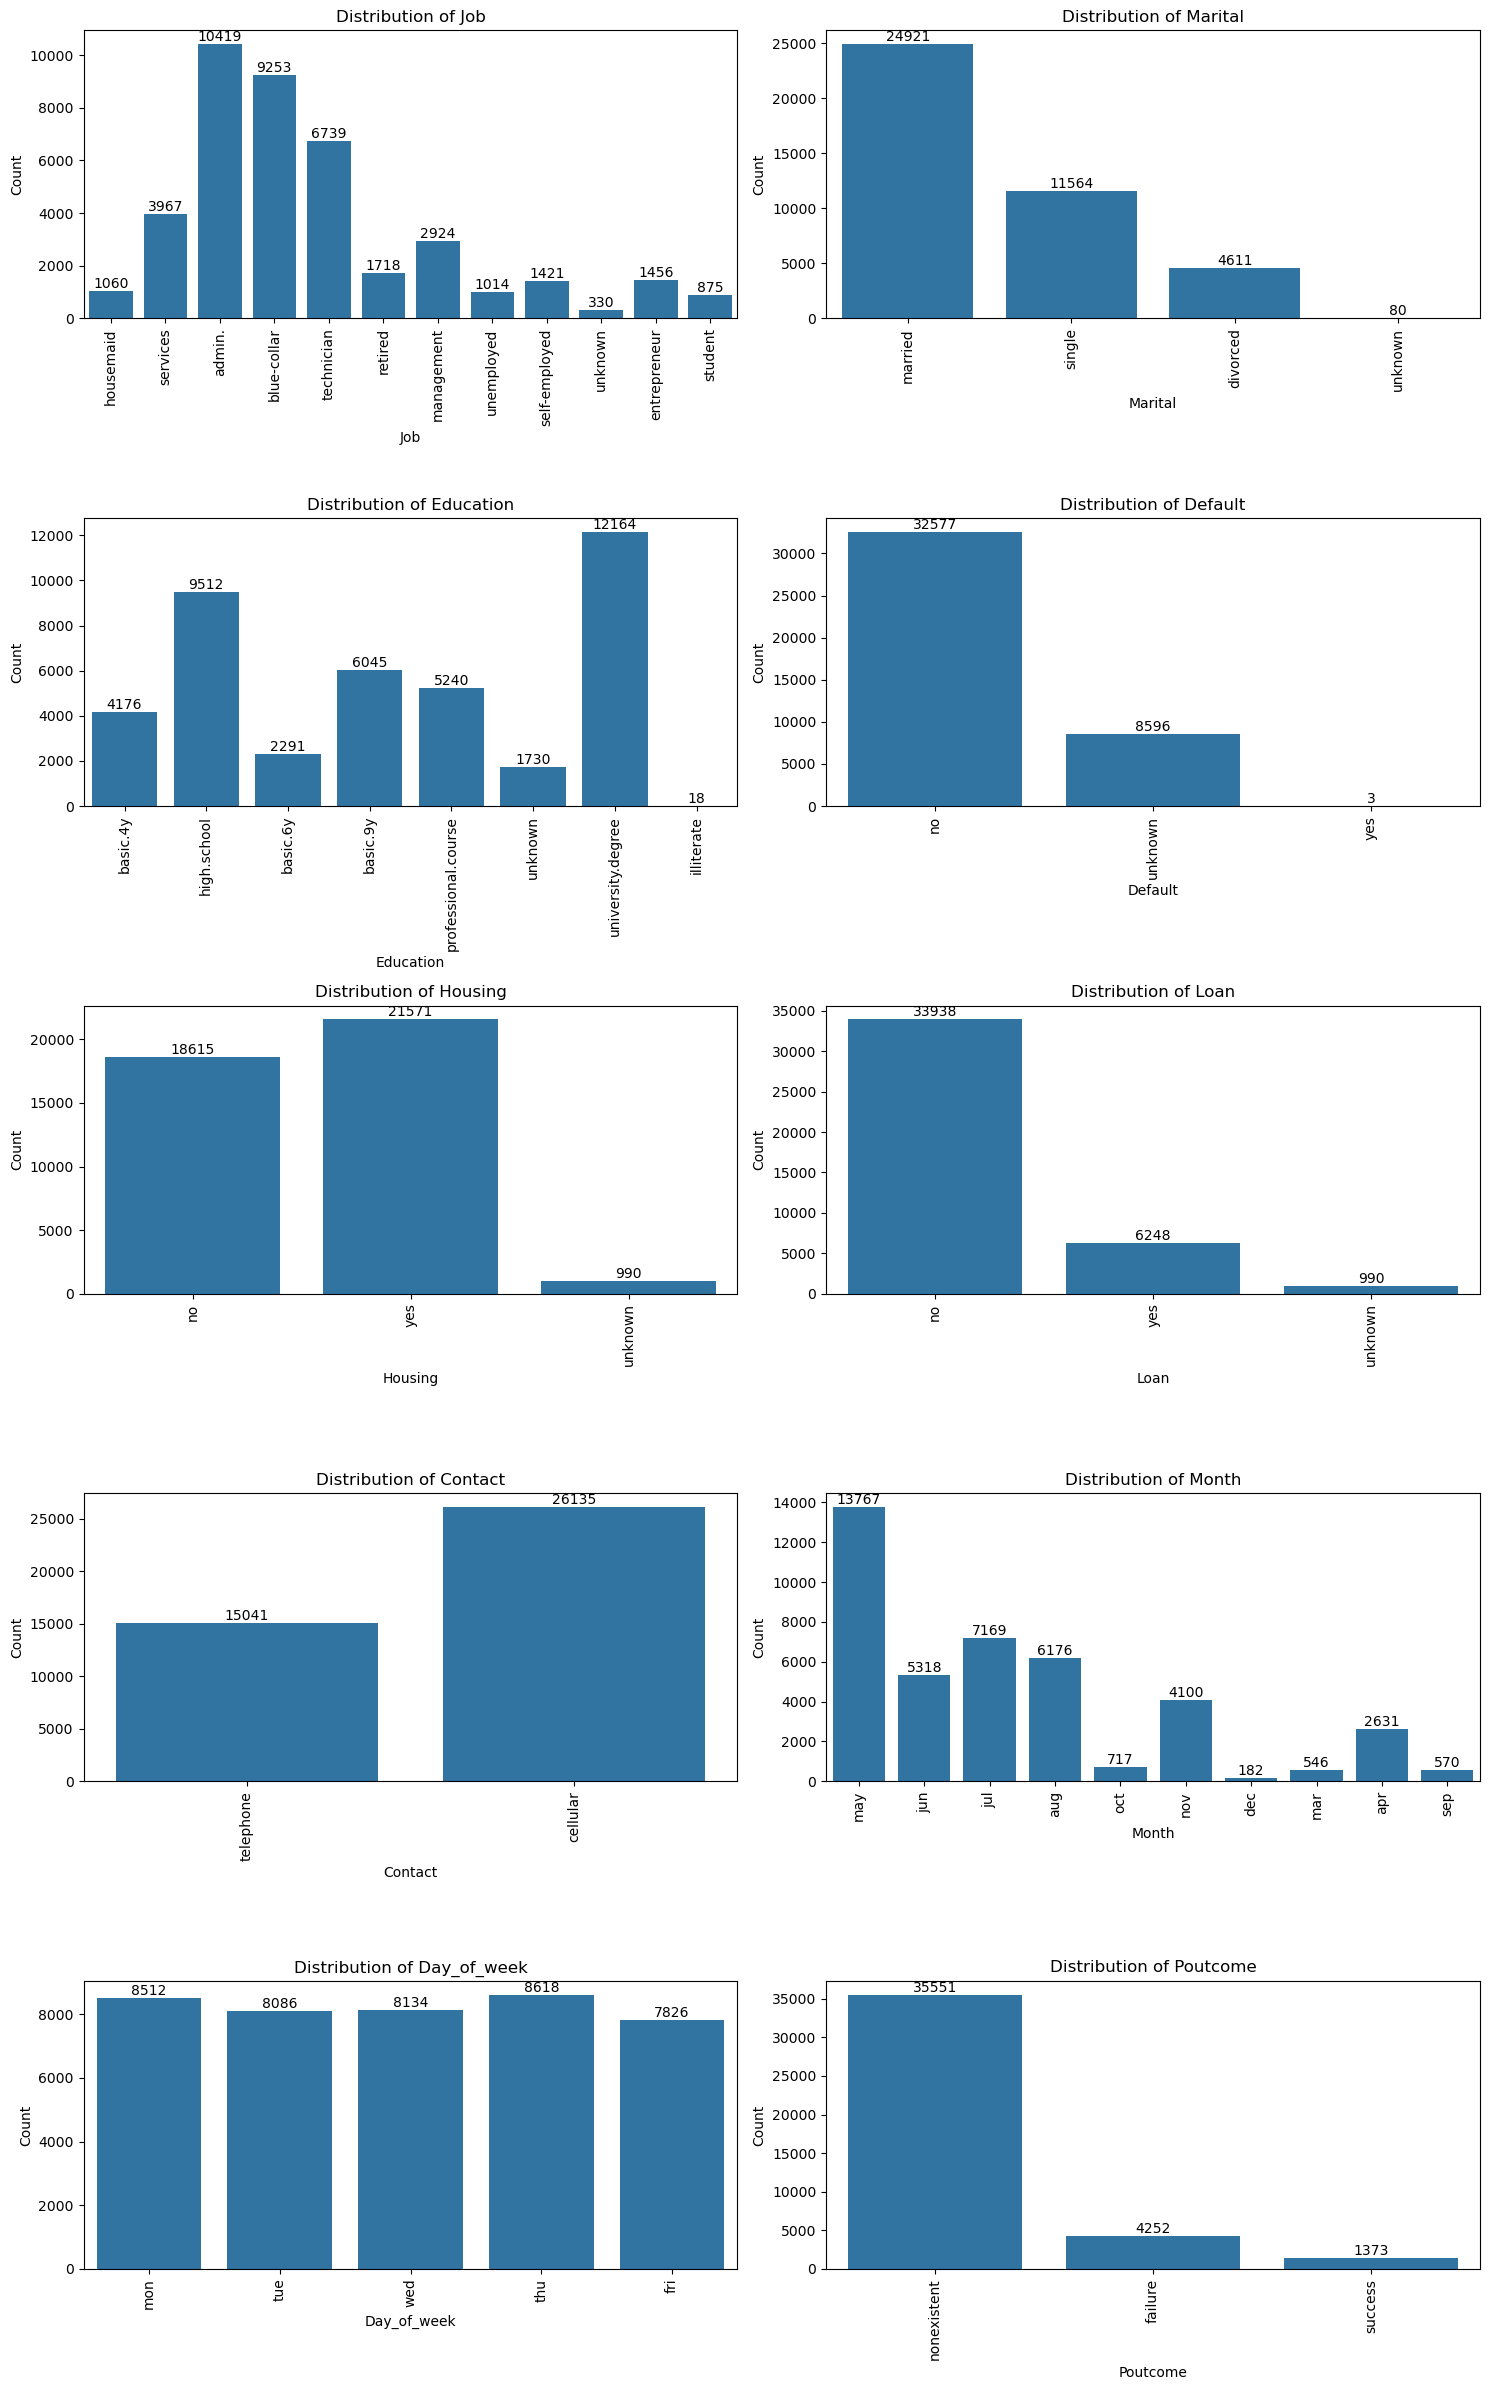

In [38]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 24))

ax = ax.flatten()

for i, col in enumerate(df.drop(columns='y').select_dtypes(include='object').columns):
    sns.countplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(f'Distribution of {col.capitalize()}')
    ax[i].set_xlabel(f'{col.capitalize()}')
    ax[i].set_ylabel('Count')
    ax[i].tick_params(axis='x', rotation=90)
    for container in ax[i].containers:
        ax[i].bar_label(container)

plt.tight_layout()

### 3.2. Target Analysis

#### 3.2.1. Numerical

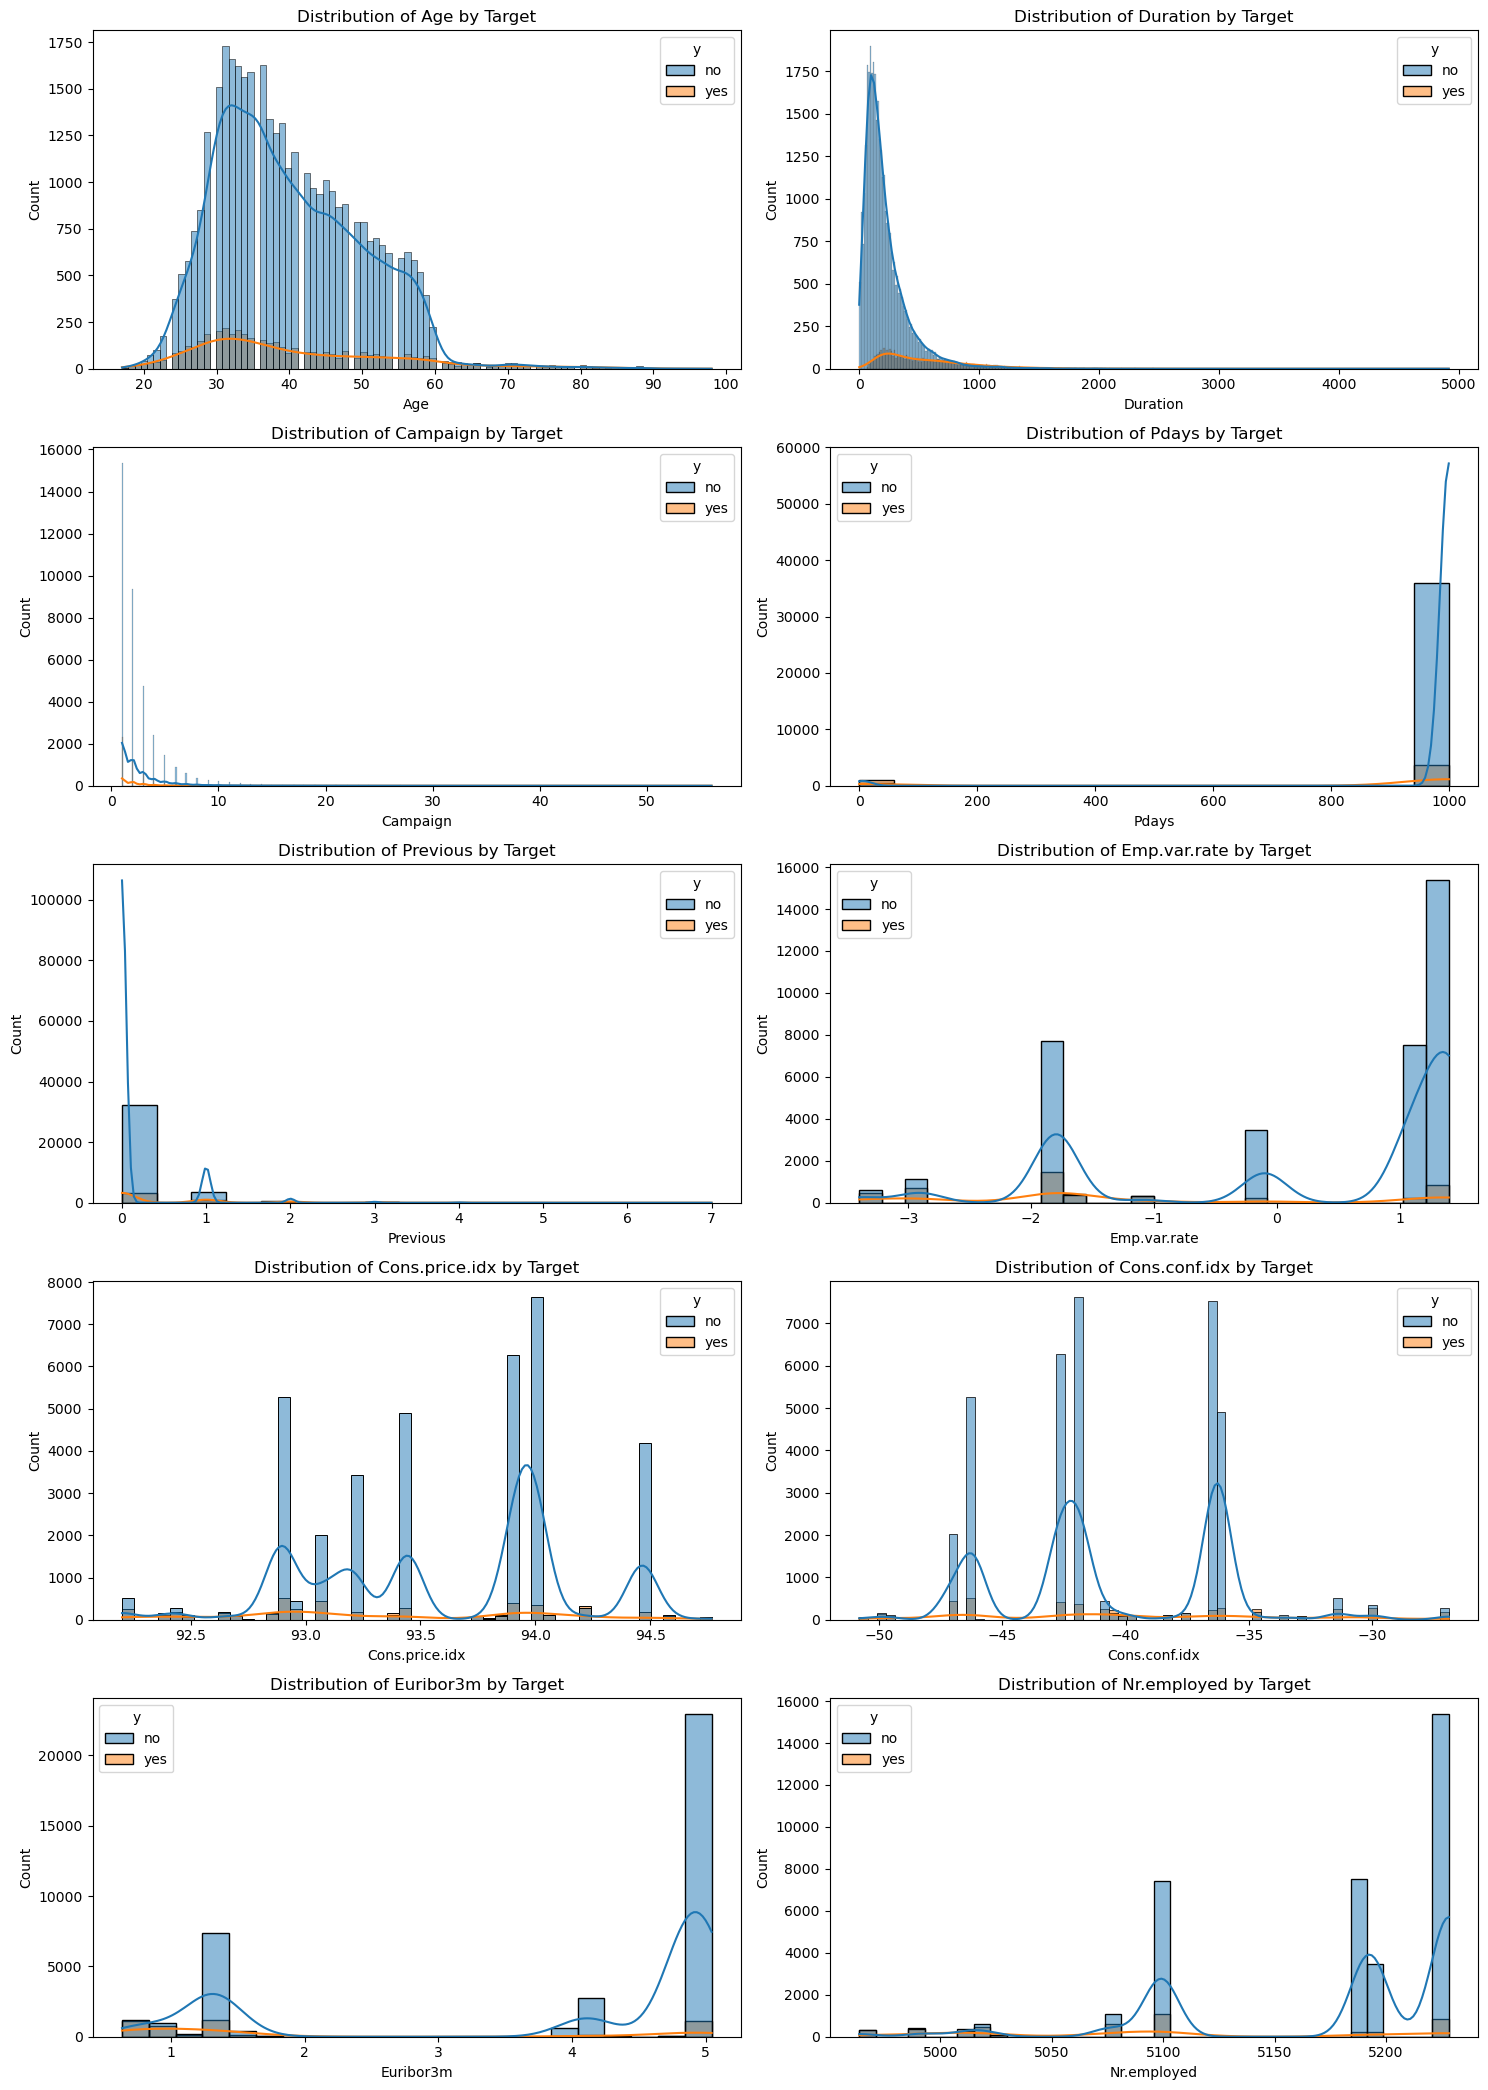

In [43]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 21))

ax = ax.flatten()

for i, col in enumerate(df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].columns):
    if col != 'y':
        sns.histplot(data=df, x=col, hue='y', kde=True, ax=ax[i])
        ax[i].set_title(f'Distribution of {col.capitalize()} by Target')
        ax[i].set_xlabel(f'{col.capitalize()}')
        ax[i].set_ylabel('Count')

plt.tight_layout()

#### 3.2.2. Categorical

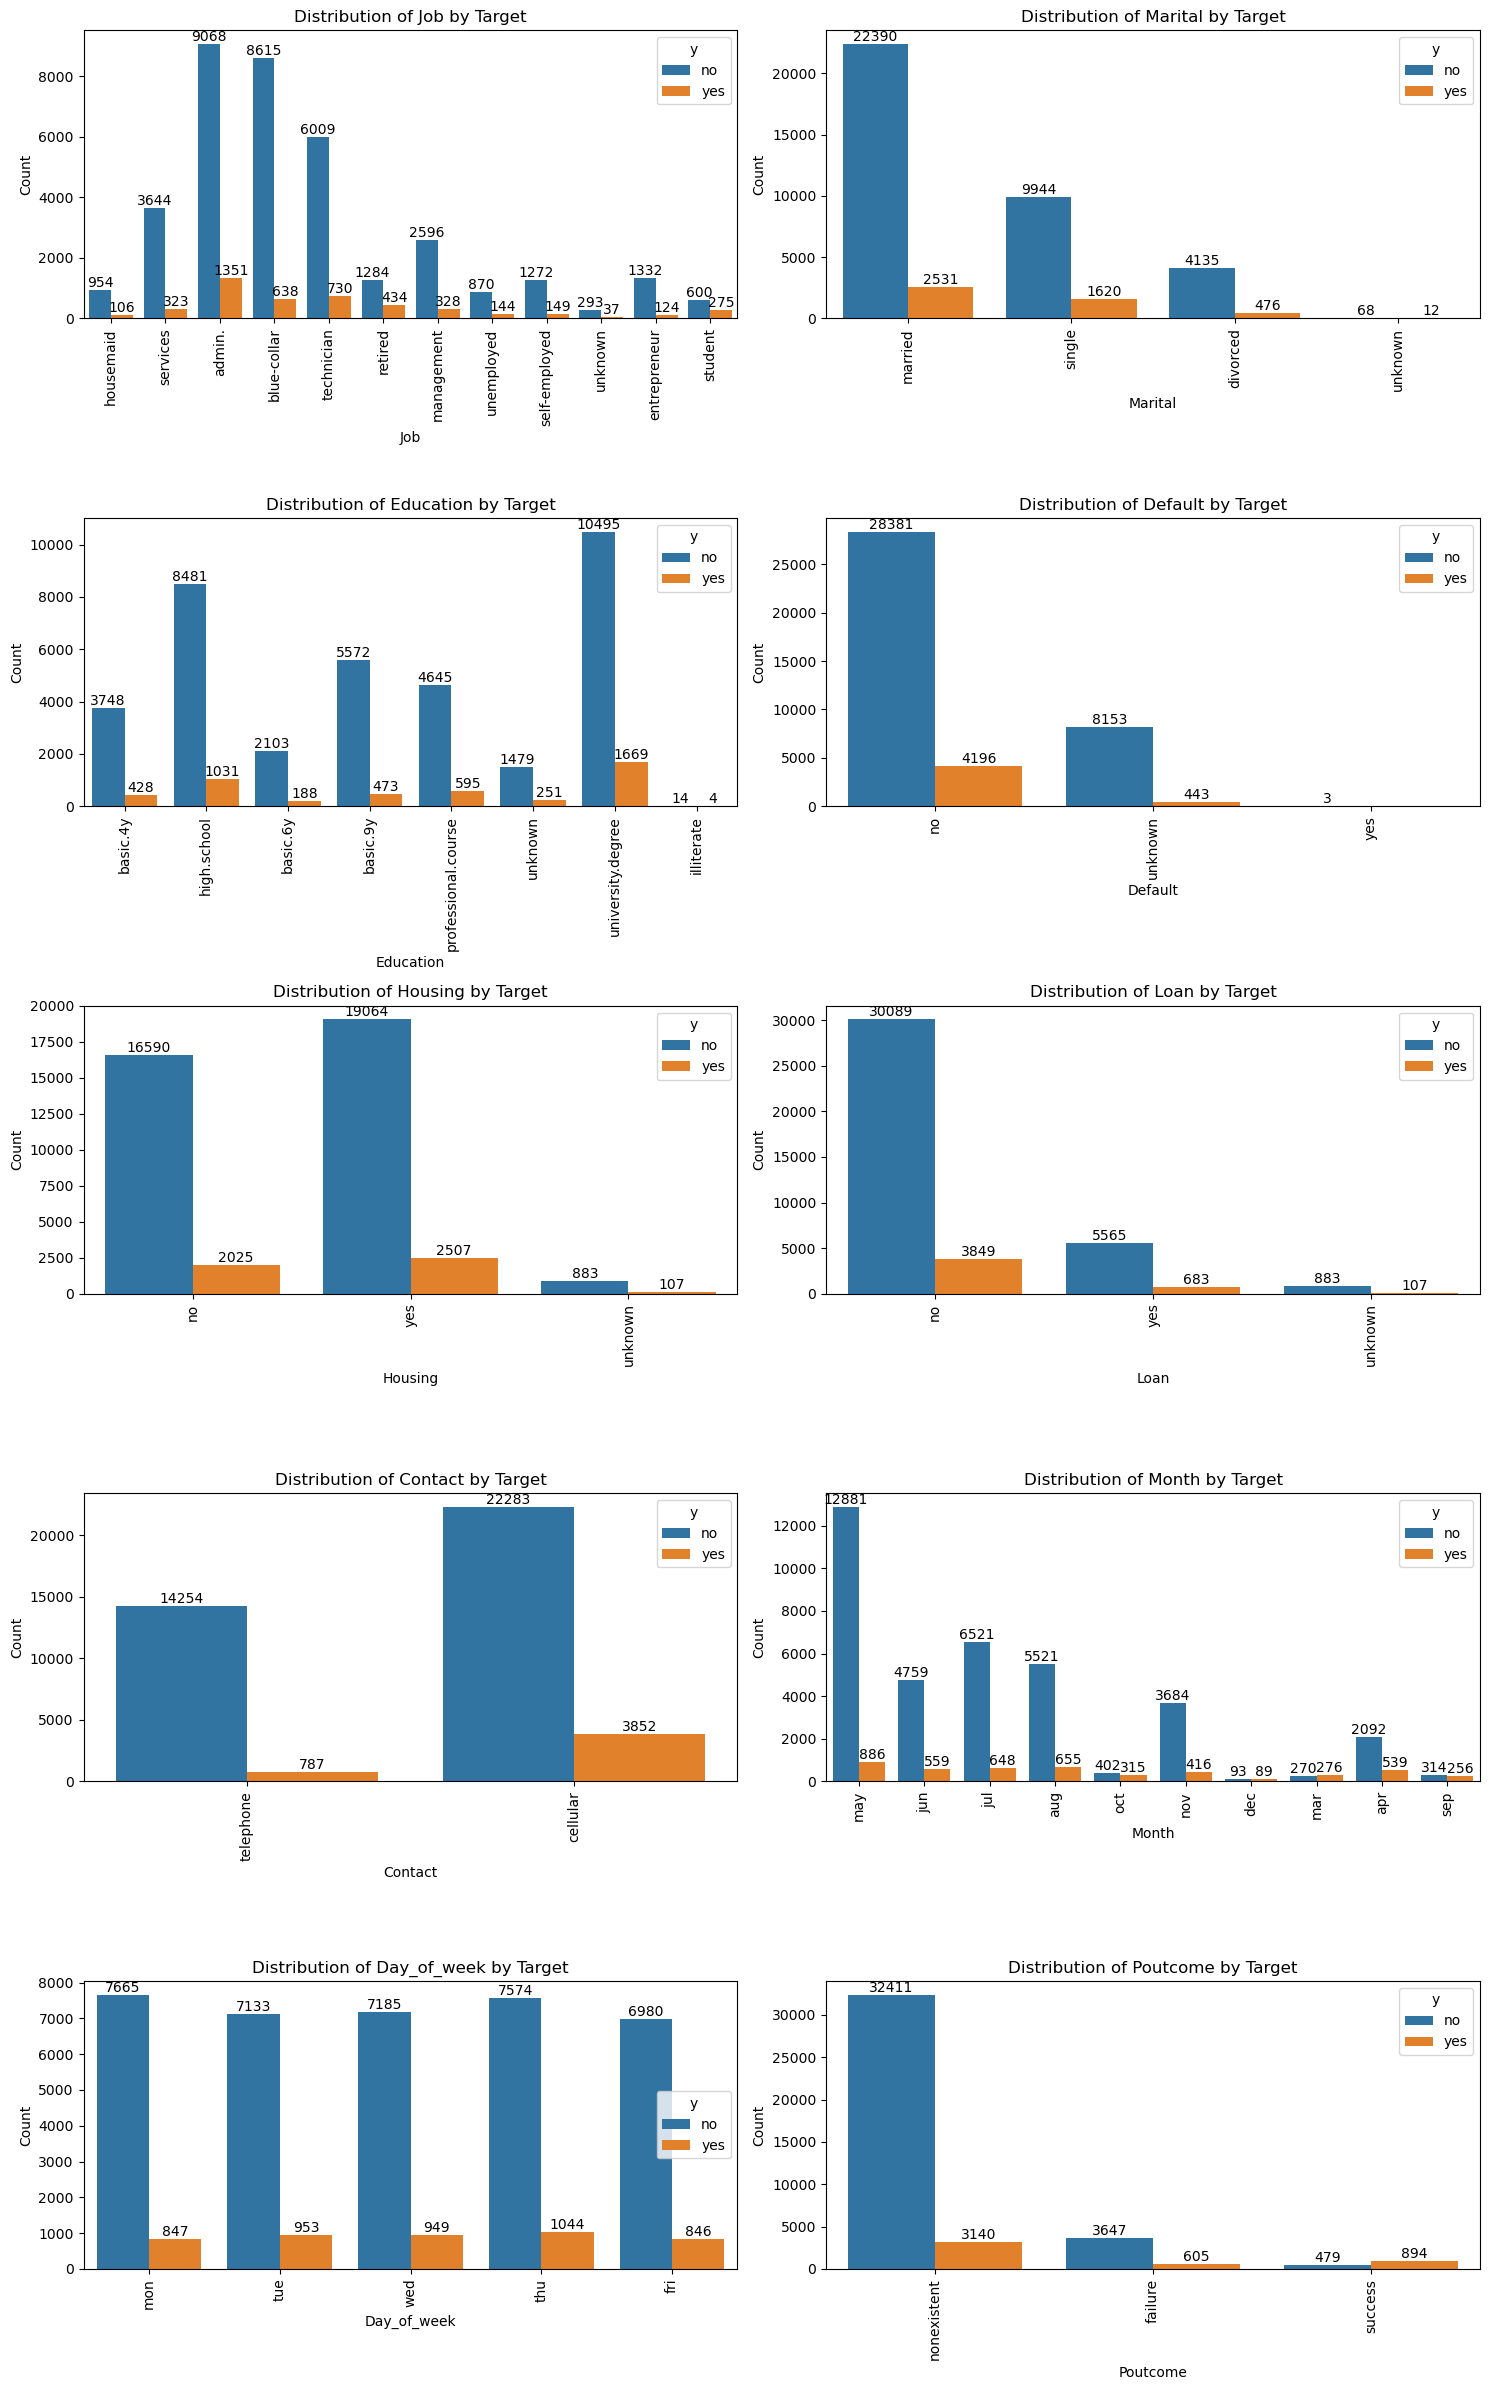

In [48]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 24))

ax = ax.flatten()

for i, col in enumerate(df.select_dtypes(include='object').columns):
    if col != 'y':
        sns.countplot(data=df, x=col, hue='y', ax=ax[i])
        ax[i].set_title(f'Distribution of {col.capitalize()} by Target')
        ax[i].set_xlabel(f'{col.capitalize()}')
        ax[i].set_ylabel('Count')
        ax[i].tick_params(axis='x', rotation=90)
        for container in ax[i].containers:
            ax[i].bar_label(container)

plt.tight_layout()

## Data Preprocessing

### Missing Values

### Outliers

## Exploratory Data Analysis (EDA)

## Feature Engineering

## Methodology

### Modeling

### Analysis

## Conclusion and Recommendation

### Conclusion

### Recommendation